# Plot Vault Share Prices and APY
This notebook demonstrates how to fetch and plot share prices and APY for multiple vaults.

In [8]:
import sys
sys.path.append('../src')

from fetcher import Fetcher
from config import VAULTS
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
# Create fetchers for each vault
moonwell_fetcher = Fetcher(VAULTS['Moonwell'])
gauntlet_fetcher = Fetcher(VAULTS['Gauntlet'])
re7_fetcher = Fetcher(VAULTS['Re7'])

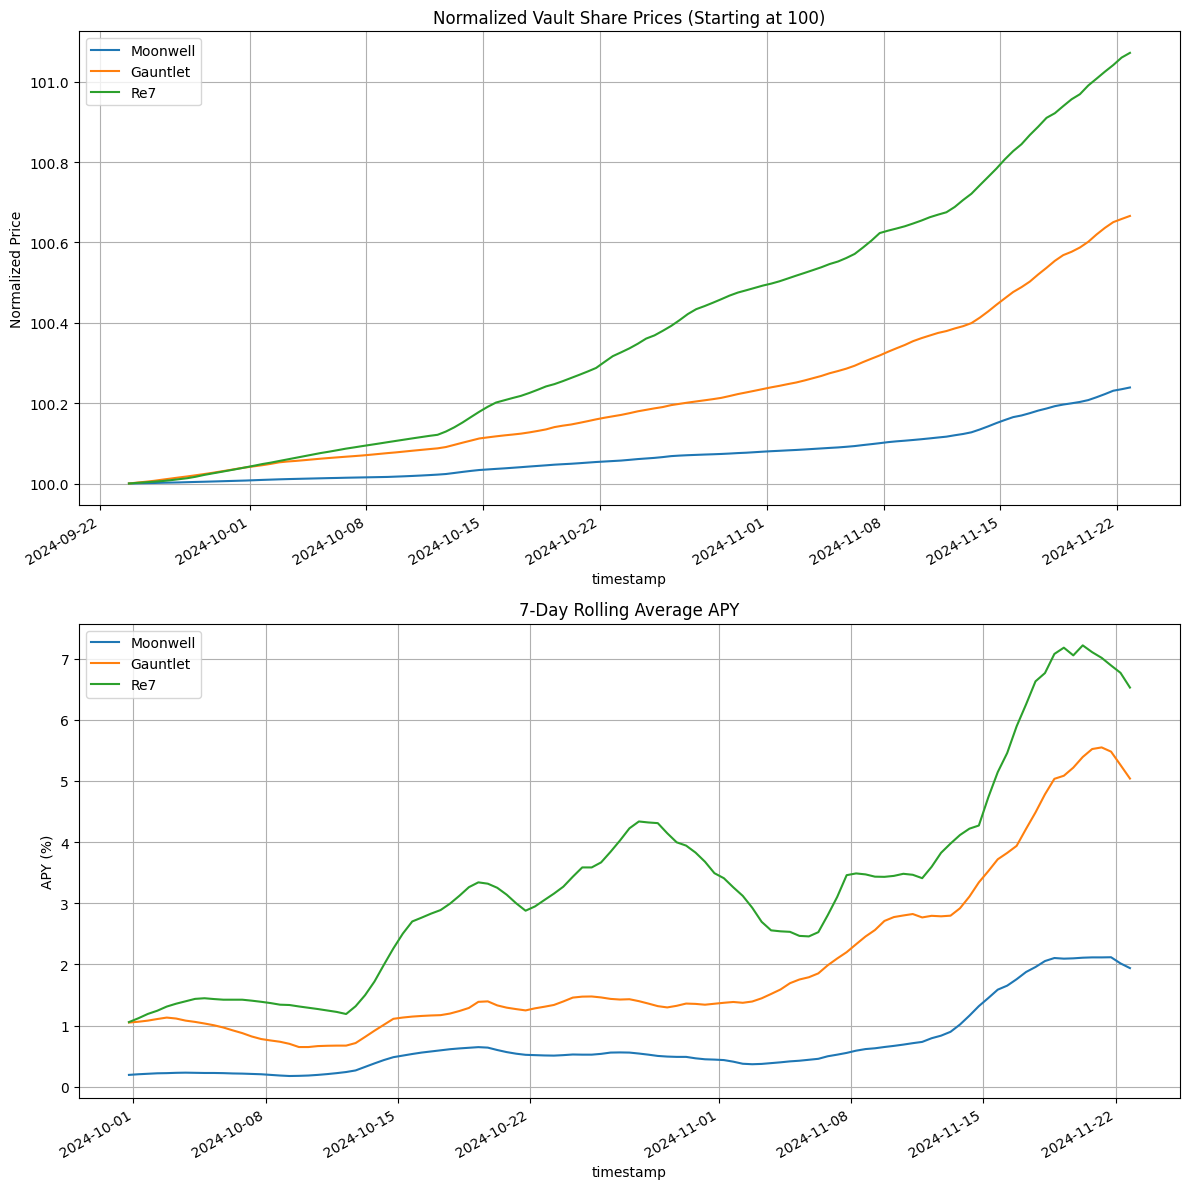

In [13]:
# Set time range for 2 months
end_date = datetime.now()
start_date = end_date - timedelta(days=60)  # Last 60 days

# Fetch and process data for each vault
def fetch_and_process(fetcher, start_date, end_date):
    df = fetcher.fetch_prices(start_date, end_date, interval_hours=12)
    
    # Calculate daily returns and APY
    df['daily_return'] = df['price'].pct_change()
    df['apy'] = ((1 + df['daily_return']) ** 365 - 1) * 100
    
    # Calculate 7-day rolling average APY
    df['rolling_apy'] = df['apy'].rolling(window=14).mean()  # 14 periods = 7 days (with 12-hour intervals)
    
    # Normalize prices to start at 100
    first_price = df['price'].iloc[0]
    df['normalized_price'] = df['price'] * (100 / first_price)
    
    return df

# Process data for each vault
moonwell_df = fetch_and_process(moonwell_fetcher, start_date, end_date)
gauntlet_df = fetch_and_process(gauntlet_fetcher, start_date, end_date)
re7_df = fetch_and_process(re7_fetcher, start_date, end_date)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot normalized share prices
moonwell_df.plot(x='timestamp', y='normalized_price', ax=ax1, label='Moonwell')
gauntlet_df.plot(x='timestamp', y='normalized_price', ax=ax1, label='Gauntlet')
re7_df.plot(x='timestamp', y='normalized_price', ax=ax1, label='Re7')

ax1.set_title('Normalized Vault Share Prices (Starting at 100)')
ax1.set_ylabel('Normalized Price')
ax1.legend()
ax1.grid(True)

# Plot 7-day rolling average APY
moonwell_df.plot(x='timestamp', y='rolling_apy', ax=ax2, label='Moonwell')
gauntlet_df.plot(x='timestamp', y='rolling_apy', ax=ax2, label='Gauntlet')
re7_df.plot(x='timestamp', y='rolling_apy', ax=ax2, label='Re7')

ax2.set_title('7-Day Rolling Average APY')
ax2.set_ylabel('APY (%)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


In [14]:

# Print average APY over the entire period
print("\nAverage APY over the last 2 months:")
print(f"Moonwell: {moonwell_df['apy'].mean():.2f}%")
print(f"Gauntlet: {gauntlet_df['apy'].mean():.2f}%")
print(f"Re7: {re7_df['apy'].mean():.2f}%")


Average APY over the last 2 months:
Moonwell: 0.73%
Gauntlet: 2.05%
Re7: 3.32%
